# Baseline Model: Linear Regression

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Loading in the data
df = pd.read_excel('data/eth_api_data.xlsx')
df.set_index('t', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2223 entries, 2015-08-08 to 2021-09-11
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   count               2223 non-null   int64  
 1   sending_count       2223 non-null   int64  
 2   receiving_count     2223 non-null   int64  
 3   active_count        2223 non-null   int64  
 4   new_non_zero_count  2223 non-null   int64  
 5   block_height        2223 non-null   int64  
 6   sopr                2223 non-null   float64
 7   price_usd_close     2223 non-null   float64
 8   marketcap_usd       2223 non-null   float64
 9   difficulty_latest   2223 non-null   int64  
 10  hash_rate_mean      2223 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 208.4 KB


In [3]:
df.head()

,count,sending_count,receiving_count,active_count,new_non_zero_count,block_height,sopr,price_usd_close,marketcap_usd,difficulty_latest,hash_rate_mean
t,,,,,,,,,,,
2015-08-08,10641,582,439,800,353,55869,0.459823,0.769981,8.983510e+07,1606016380751,9.644985e+10
2015-08-09,10894,457,489,731,253,60992,0.403942,0.719830,5.507245e+07,1741399466631,1.013969e+11
2015-08-10,11543,804,749,997,649,66247,0.360587,0.700705,4.878861e+07,1948102094734,1.116431e+11
2015-08-11,13432,2119,2106,2339,1889,71527,0.614763,1.088361,5.745360e+07,2171897473895,1.240757e+11
2015-08-12,13744,565,673,904,312,76651,0.609176,1.214071,8.079017e+07,2248237602936,1.308930e+11


# Model Building

In [4]:
# Dropping the target column 'price_usd_close' to separate the independent features
X = df.drop('price_usd_close', axis = 1)

# Setting the dependent variable as 'price_usd_close'
y = df.price_usd_close

# Splitting up the independent and dependent variables into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Instantiating a Linear Regression Model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [6]:
print(model.coef_)

[-1.45419811e-06  2.49075579e-04  1.52684206e-04  5.93047095e-05
 -5.44048089e-06  2.80380308e-06 -4.70645415e-11  8.43664298e-09
  9.69911000e-15 -3.35888340e-14]


In [7]:
print(model.intercept_)

-4.07373857380577


In [8]:
# Making predictions using the test set
predict = model.predict(X_test)
predict

array([-1.36990008e+00,  2.71537291e+02,  1.32614304e+03,  1.37689091e+03,
        7.24875191e+02,  1.91095766e+02,  1.24020591e+02,  1.47451999e+01,
        1.31164473e+03,  2.43506663e+02,  2.47360459e+02,  6.09091089e+02,
        1.44399866e+02, -1.24071806e+00,  3.55742284e+02,  3.39740591e+00,
        2.59954728e+02,  1.71111117e+01,  3.10685540e+02,  1.61208524e+02,
        1.62397103e+01, -1.20827720e+00,  2.91470629e+02,  1.67334372e+02,
        1.34804559e+02,  9.59203333e+00,  1.89213008e+01,  2.86764180e+01,
        5.69360486e+01,  2.72874995e+03,  1.71500644e+01,  1.59686050e+02,
        8.35939940e+01,  1.65390503e+02,  3.59032602e+02,  1.07892364e+02,
        3.00612382e+02,  1.68346329e+02,  4.45706131e+02,  2.92733912e+02,
        7.24755053e-01,  1.73245010e+01,  2.21453215e+02,  3.10215187e+03,
        1.14475346e+01,  1.38222507e+01, -2.13572073e+00,  3.78520409e+03,
        2.02175516e+02,  2.06380033e+02,  2.40936402e+02,  3.87358949e+02,
        4.44977250e+02,  

In [9]:
# Creating a DataFrame for the actual and predicted price
actuals_and_preds = pd.DataFrame({'Actual':y_test, 'Predicted':predict})

In [10]:
actuals_and_preds.head(10)

,Actual,Predicted
t,,
2015-11-12,0.899091,-1.369900
2019-06-13,255.988815,271.537291
2021-01-26,1354.411557,1326.143044
2021-01-19,1377.230381,1376.890909
2017-12-14,698.126000,724.875191
2017-07-15,168.788000,191.095766
2019-01-26,116.462311,124.020591
2016-05-24,12.820000,14.745200
2021-01-10,1266.832209,1311.644729


### Assessing Model Performance

In [11]:
print('Mean Absolute Error', metrics.mean_absolute_error(y_test, predict))
print('Mean Squared Error', metrics.mean_squared_error(y_test, predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, predict))) # Actual metric that is used

Mean Absolute Error 14.805033839392527
Mean Squared Error 786.0233507855439
Root Mean Squared Error 28.036107982128044


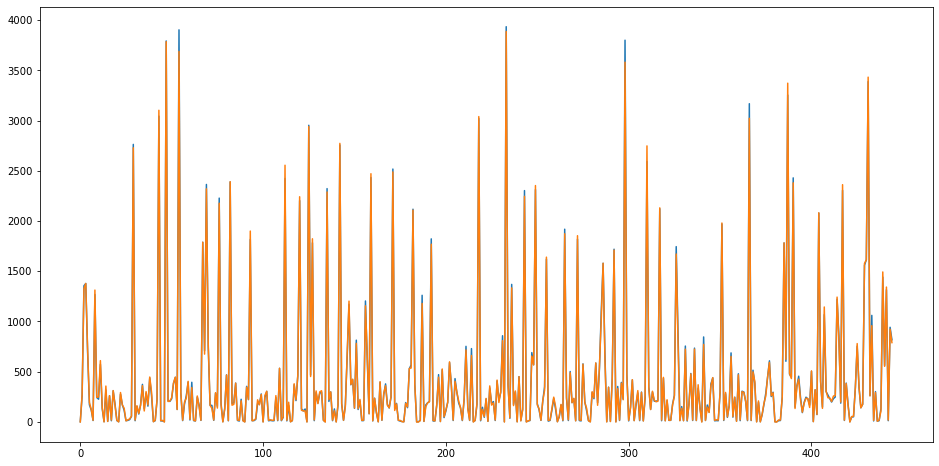

In [12]:
plt.figure(1, figsize=(16,8))
plt.plot(actuals_and_preds.values);